# NAME - Rohit Badhai


# Task 2 - Stock Market Prediction and Forecasting Using Stacked LSTM


# Datasetlinks: : https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

# Importing Libraries

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Loading and Reading The dataset

In [12]:
data = pd.read_csv("stock.csv")

In [13]:
data.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [14]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [124]:
data.describe


<bound method NDFrame.describe of            Date    Open    High     Low    Last   Close  Total Trade Quantity  \
0    2018-09-28  234.05  235.95  230.20  233.50  233.75               3069914   
1    2018-09-27  234.55  236.80  231.10  233.80  233.25               5082859   
2    2018-09-26  240.00  240.00  232.50  235.00  234.25               2240909   
3    2018-09-25  233.30  236.75  232.00  236.25  236.10               2349368   
4    2018-09-24  233.55  239.20  230.75  234.00  233.30               3423509   
...         ...     ...     ...     ...     ...     ...                   ...   
2030 2010-07-27  117.60  119.50  112.00  118.80  118.65                586100   
2031 2010-07-26  120.10  121.00  117.10  117.10  117.60                658440   
2032 2010-07-23  121.80  121.95  120.25  120.35  120.65                281312   
2033 2010-07-22  120.30  122.00  120.25  120.75  120.90                293312   
2034 2010-07-21  122.10  123.00  121.05  121.10  121.55                6586

In [126]:
data.dtypes

Date                    datetime64[ns]
Open                           float64
High                           float64
Low                            float64
Last                           float64
Close                          float64
Total Trade Quantity             int64
Turnover (Lacs)                float64
dtype: object

In [17]:
data['Date'] = pd.to_datetime(data['Date'])
df=data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [19]:
df.reset_index(inplace=True)

In [20]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


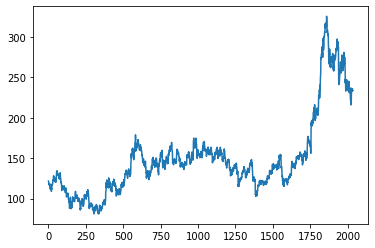

In [21]:
plt.plot(df['Close'])

In [22]:
df1=df['Close']

# Scaling Of Dataset

In [24]:
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [47]:
training_range = int(len(df1)*0.70)
test_range=len(df1)-training_range
train_data , test_data = df1[0:training_range,:] ,df1[training_range:len(df1),:1]

In [48]:
training_range

1424

In [49]:
test_range

611

In [90]:
train_data

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.15012255],
       [0.15747549],
       [0.15277778]])

In [89]:
test_data


array([[0.1621732 ],
       [0.15951797],
       [0.16707516],
       [0.15992647],
       [0.16053922],
       [0.16441993],
       [0.16687092],
       [0.1693219 ],
       [0.16074346],
       [0.15972222],
       [0.16401144],
       [0.15727124],
       [0.14705882],
       [0.14460784],
       [0.15175654],
       [0.15441176],
       [0.15216503],
       [0.14848856],
       [0.15522876],
       [0.15767974],
       [0.1621732 ],
       [0.16094771],
       [0.16339869],
       [0.15931373],
       [0.15972222],
       [0.16115196],
       [0.16666667],
       [0.15747549],
       [0.15379902],
       [0.14848856],
       [0.15114379],
       [0.1503268 ],
       [0.15155229],
       [0.15645425],
       [0.16033497],
       [0.1566585 ],
       [0.15686275],
       [0.17749183],
       [0.17973856],
       [0.1744281 ],
       [0.19281046],
       [0.18607026],
       [0.18811275],
       [0.18443627],
       [0.18280229],
       [0.18464052],
       [0.18178105],
       [0.189

In [60]:
def create_dataset(dataset,time_interval=1):
    dataX,dataY =[],[]
    for i in range(len(dataset) - time_interval-1):
        a = dataset[i:(i+time_interval),0]
        dataX.append(a)
        dataY.append(dataset[i+time_interval,0])
    return np.array(dataX) , np.array(dataY)

In [65]:
time_interval = 100
X_train,y_train = create_dataset(train_data,time_interval)
X_test,y_test = create_dataset(test_data,time_interval)

In [66]:
print(X_train)

[[0.16584967 0.16319444 0.1621732  ... 0.14011438 0.13848039 0.12479575]
 [0.16319444 0.1621732  0.14971405 ... 0.13848039 0.12479575 0.12254902]
 [0.1621732  0.14971405 0.15400327 ... 0.12479575 0.12254902 0.13010621]
 ...
 [0.18280229 0.19178922 0.19219771 ... 0.16441993 0.15236928 0.15482026]
 [0.19178922 0.19219771 0.19281046 ... 0.15236928 0.15482026 0.15420752]
 [0.19219771 0.19281046 0.21058007 ... 0.15482026 0.15420752 0.15012255]]


In [67]:
print(y_train)

[0.12254902 0.13010621 0.13541667 ... 0.15420752 0.15012255 0.15747549]


In [91]:
X_train.shape


(1323, 100, 1)

In [93]:
y_train.shape

(1323,)

In [68]:
print(X_test.shape),print(y_test.shape)

(510, 100)
(510,)


(None, None)

In [70]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [94]:
X_train


array([[[0.16584967],
        [0.16319444],
        [0.1621732 ],
        ...,
        [0.14011438],
        [0.13848039],
        [0.12479575]],

       [[0.16319444],
        [0.1621732 ],
        [0.14971405],
        ...,
        [0.13848039],
        [0.12479575],
        [0.12254902]],

       [[0.1621732 ],
        [0.14971405],
        [0.15400327],
        ...,
        [0.12479575],
        [0.12254902],
        [0.13010621]],

       ...,

       [[0.18280229],
        [0.19178922],
        [0.19219771],
        ...,
        [0.16441993],
        [0.15236928],
        [0.15482026]],

       [[0.19178922],
        [0.19219771],
        [0.19281046],
        ...,
        [0.15236928],
        [0.15482026],
        [0.15420752]],

       [[0.19219771],
        [0.19281046],
        [0.21058007],
        ...,
        [0.15482026],
        [0.15420752],
        [0.15012255]]])

# Building The LSTM

In [72]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [74]:
model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))


In [76]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [78]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [80]:
model.fit(X_train,y_train,validation_data=(X_test , y_test),epochs = 50,batch_size=64,verbose=1)

Epoch 1/50
21/21 [==============================] - 9s 186ms/step - loss: 0.0110 - val_loss: 0.0382
Epoch 2/50
21/21 [==============================] - 3s 150ms/step - loss: 0.0019 - val_loss: 0.0029
Epoch 3/50
21/21 [==============================] - 3s 149ms/step - loss: 8.4896e-04 - val_loss: 0.0029
Epoch 4/50
21/21 [==============================] - 3s 148ms/step - loss: 7.6508e-04 - val_loss: 0.0031
Epoch 5/50
21/21 [==============================] - 3s 149ms/step - loss: 7.5393e-04 - val_loss: 0.0025
Epoch 6/50
21/21 [==============================] - 3s 150ms/step - loss: 7.2747e-04 - val_loss: 0.0023
Epoch 7/50
21/21 [==============================] - 3s 148ms/step - loss: 6.9568e-04 - val_loss: 0.0023
Epoch 8/50
21/21 [==============================] - 3s 152ms/step - loss: 6.7017e-04 - val_loss: 0.0022
Epoch 9/50
21/21 [==============================] - 4s 201ms/step - loss: 6.4240e-04 - val_loss: 0.0024
Epoch 10/50
21/21 [==============================] - 4s 199ms/step - los

In [84]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [85]:
import math
math.sqrt(mean_squared_error(y_train,train_predict))

0.012817746531613886

In [87]:
math.sqrt(mean_squared_error(y_test,test_predict))

0.030246720705208417

# Predictions of the Data

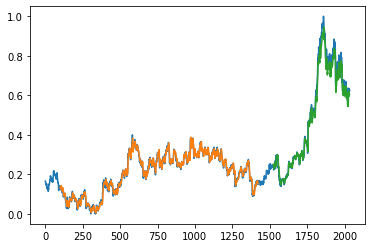

In [96]:
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [97]:
len(test_data),X_test.shape

(611, (510, 100, 1))

In [114]:
X_input = test_data[207:].reshape(1,-1)
X_input.shape

(1, 404)

In [115]:
temp_input = list(X_input)
temp_input = temp_input[0].tolist()

In [119]:
lst_output=[]
n_steps=302
numberofdays=30
i=0

while(i<numberofdays):
    if(len(temp_input)>100):
        X_input = np.array(temp_input[:])
        print("{} day input {}".format(i,X_input))
        X_input = X_input.reshape(1,-1)
#         X_input = X_input.reshape(1,n_steps,1)
#         yhat = model.predict(X_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        X_input= X_input.reshape((1,n_steps,1))
        yhat = model.predict(X_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

0 day input [0.24918301 0.24611928 0.23611111 0.24162582 0.24183007 0.24775327
 0.24775327 0.24121732 0.23815359 0.23672386 0.23325163 0.2559232
 0.24571078 0.25490196 0.25449346 0.25245098 0.24693627 0.24448529
 0.22937092 0.23917484 0.24489379 0.26041667 0.26082516 0.26756536
 0.26531863 0.25388072 0.28860294 0.28676471 0.27634804 0.28431373
 0.28451797 0.28267974 0.28431373 0.28982843 0.29289216 0.29452614
 0.28451797 0.28594771 0.29595588 0.28921569 0.28410948 0.27982026
 0.2745098  0.28288399 0.29084967 0.28737745 0.29003268 0.28901144
 0.29738562 0.29064542 0.29473039 0.31352124 0.30739379 0.30392157
 0.29146242 0.29268791 0.29861111 0.30187908 0.29840686 0.29289216
 0.30085784 0.3002451  0.29370915 0.27185458 0.28002451 0.27308007
 0.26062092 0.24816176 0.25367647 0.26940359 0.26327614 0.26388889
 0.27961601 0.29187092 0.30187908 0.30228758 0.2943219  0.30473856
 0.30085784 0.30004085 0.29064542 0.30841503 0.31658497 0.3192402
 0.31556373 0.30821078 0.31004902 0.30984477 0.30147

# Plotting Result

<function matplotlib.pyplot.show(close=None, block=None)>

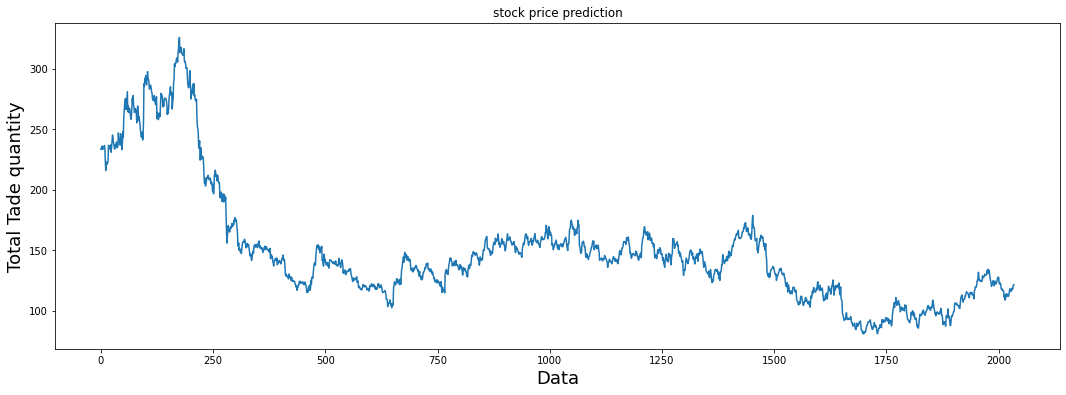

In [127]:
plt.figure(figsize=(18,6))
plt.title("stock price prediction")
plt.plot(data['Close'])
plt.xlabel('Data',fontsize=18)
plt.ylabel('Total Tade quantity',fontsize=18)
plt.show

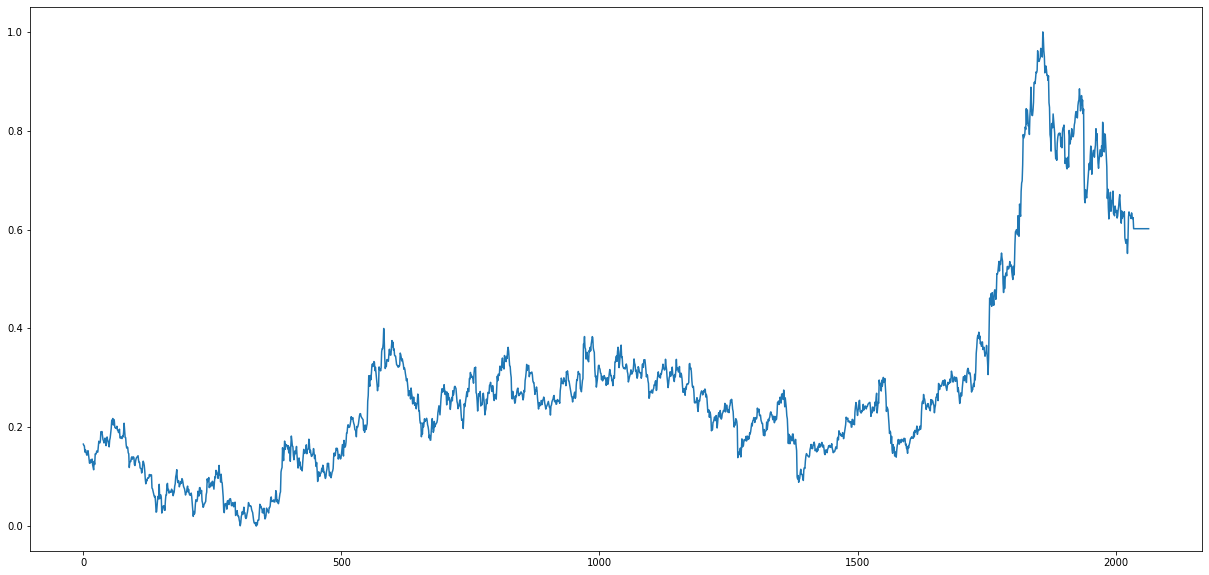

In [120]:
plt.figure(figsize=(21,10))
df=df1.tolist()
df.extend(lst_output)
df=scaler.inverse_transform(df).tolist()
plt.plot(df)
